In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import librosa
import soundfile as sf
import numpy as np
from pathlib import Path

In [2]:
class AudioDataset(Dataset):

    def __init__(self, root, sample_rate = 22050):
        self.root = root
        self.sample_rate = sample_rate
        self.audio_paths = self._get_audio_paths()
        self.max_length = self._find_max_length()


    def _get_audio_paths(self):
        return list(Path(self.root).rglob('*.wav'))


    def _find_max_length(self):
        lengths = [sf.info(path).frames for path in self.audio_paths]
        return max(lengths)


    def __len__(self):
        return len(self.audio_paths)


    def __getitem__(self, idx):
        audio_path = self.audio_paths[idx]
        y, _ = librosa.load(audio_path, sr = self.sample_rate)
        padded_y = np.pad(y, (0, max(0, self.max_length - len(y))), mode = 'constant')
        
        return padded_y, self.sample_rate

In [3]:
root_dir = '../data'

audio_dataset = AudioDataset(root_dir)

In [26]:
# Konfiguracja DataLoader
batch_size = 4  # Liczba próbek w batchu
shuffle = True  # Losowe mieszanie próbek
num_workers = 2  # Liczba wątków do ładowania danych

audio_dataloader = DataLoader(
    audio_dataset,
    batch_size=batch_size,
    shuffle=shuffle,
    num_workers=num_workers
)

# Test działania DataLoader
for batch_idx, (waveforms, sample_rates) in enumerate(audio_dataloader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Waveforms shape: {waveforms.shape}")
    print(f"Sample rates: {sample_rates}")
    break  # Tylko pierwszy batch

Batch 1:
Waveforms shape: torch.Size([4, 253053])
Sample rates: tensor([22050, 22050, 22050, 22050])


In [8]:
from noises import *


violet_noise(10000)

array([-0.45634795,  0.989504  , -0.40993446, ..., -2.19867371,
        0.09071102,  0.14679983])

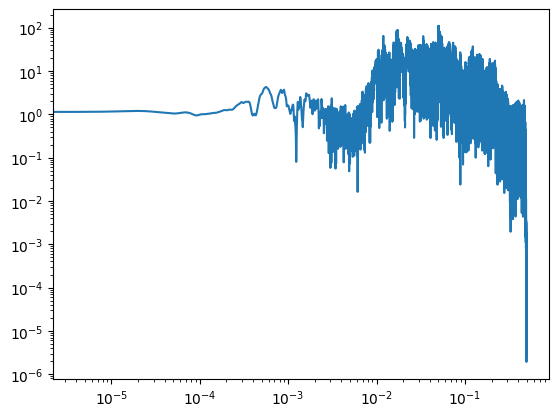

In [14]:
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

plot_spectrum(frequency_noise(audio_dataset.__getitem__(10)[0], 22050, min_freq=200, max_freq=10000))